In [2]:
%%html
    <script>
        $(document).ready(function(){

            console.log("test");
            $("#run_all_cells_below > a:nth-child(1)").trigger("click");
            $("#notification_trusted").trigger("click");
            $("button").click(function(){
                console.log("clicked");
                code_toggle();
            });

            code_show=true; 

            function code_toggle() {
                if (code_show){
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            } 

            code_toggle()
            
        });
    </script>
    <button>Toggle Code Fields</button>

In [3]:

print("test")

#!/usr/bin/env python
# coding: utf-8

# ### Render React from a Jupyter notebook cell, and access Python as needed at runtime.
# 
# The `%jsx` magic:

import json
from string import Template

from IPython.display import Javascript, display
from IPython.core.magic import register_cell_magic


display(Javascript('''
// Load our libraries from a CDN instead of wherever this notebook is hosted.
require.config({
    paths: {
        babel: 'https://unpkg.com/babel-standalone@6/babel.min',
        react: 'https://unpkg.com/react@15.3.1/dist/react',
        'react-dom': 'https://unpkg.com/react-dom@15.3.1/dist/react-dom'
    }
})

// Hook to call into Python.
// Credit to disarticulate for documenting the usage of iopub: 
//    https://gist.github.com/disarticulate/d06069ff3e71cf828e5329beab8cb084
window.python = code => new Promise((resolve, reject) => {
    IPython.notebook.kernel.execute(
        code,
        {iopub: {output: data => resolve(data.content.text)}},
    )   
})
'''))


@register_cell_magic
def jsx(line, cell):
    display(Javascript((Template('''
        require(['babel', 'react', 'react-dom'], (Babel, React, ReactDOM) => {
            eval(Babel.transform($quoted_script, {presets: ['react']}).code)
        })
    ''').substitute(quoted_script=json.dumps(cell)))))

# Some Python state to access from React:
greeting = 'Update from Python using React!'
# The punchline:
get_ipython().run_cell_magic('jsx', '', "python('print(greeting)').then(greeting => {\n    ReactDOM.render(\n      <h1>{greeting}</h1>,\n      element[0],\n    )\n})")



test


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
%%capture
import sys
!{sys.executable} -m pip install numpy matplotlib;




In [5]:
"""
This will be another comment line 
for the testing of the different sections
"""
import numpy as np
a = np.array([[1,1]])
# one line comment test
print(a.shape)
print(a)


(1, 2)
[[1 1]]


In [6]:
b = 6


[[7 7]]


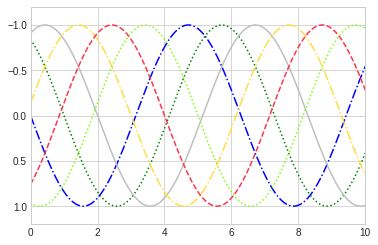

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue', linestyle='dashdot')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g', linestyle='dotted')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='solid')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44', linestyle='dashdot')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3), linestyle='dashed') # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse', linestyle='dotted' ); # all HTML color

plt.xlim(0, 10)
plt.ylim(1.2, -1.2);


# One line comment
print (a + b)
